In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [2]:
# Importing the dataset
dataset = pd.read_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSfinal.csv', sep=',')

In [3]:
dataset.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,1217353,14,634,74,60495,17,0,28415,97,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,973171,71,634,13,60495,17,1,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,1213250,14,634,74,46391,17,2,48549,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,1203225,14,634,74,11894,17,3,48337,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,1207865,14,634,74,27878,17,4,32026,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [4]:
dataset['Label'].value_counts()

Label
1    4908665
0       3354
Name: count, dtype: int64

In [5]:
data_new_20features_X = dataset[['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std']]

In [6]:
dataset_y = dataset['Label']

Label Encoding for the Dataset

In [7]:
dataset.drop('Label', axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_y_trans = le.fit_transform(dataset_y)
data_y_trans

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Train Test Split 20 Features Dataset


In [12]:
from sklearn.model_selection import train_test_split
X_train_20features, X_test_20features, y_train_20features, y_test_20features = train_test_split( data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

Standardization of the 20 Feature Dataset

In [13]:
from sklearn.preprocessing import StandardScaler

ss20 = StandardScaler()
X_train_20features_std = ss20.fit_transform(X_train_20features)
X_test_20features_std = ss20.fit_transform(X_test_20features)

Naive Bayes Model for 20 Features Dataset

Accuracy: 0.9989345863141166


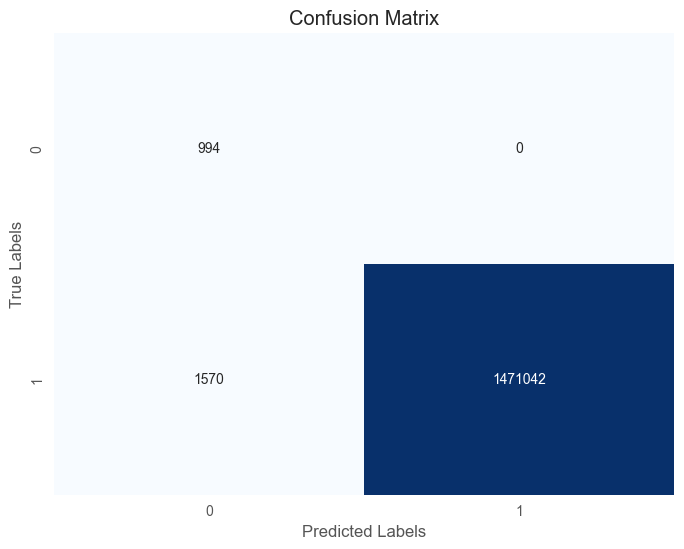

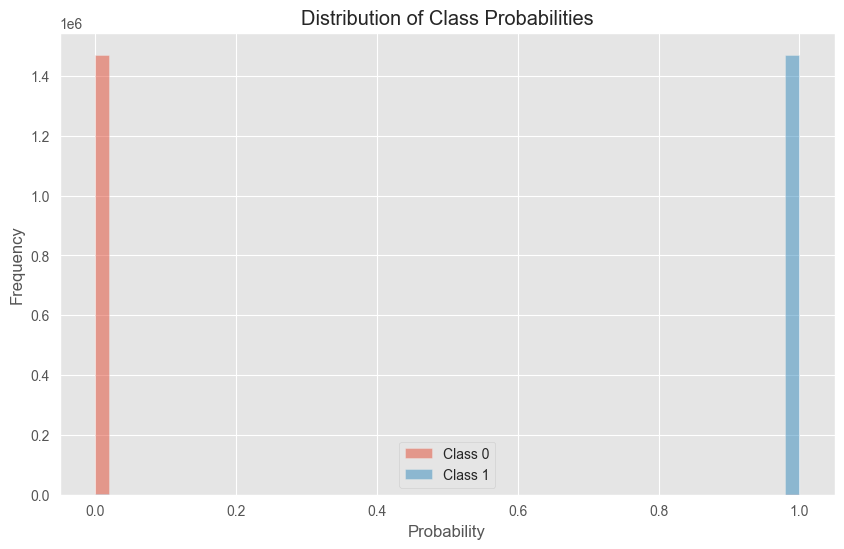

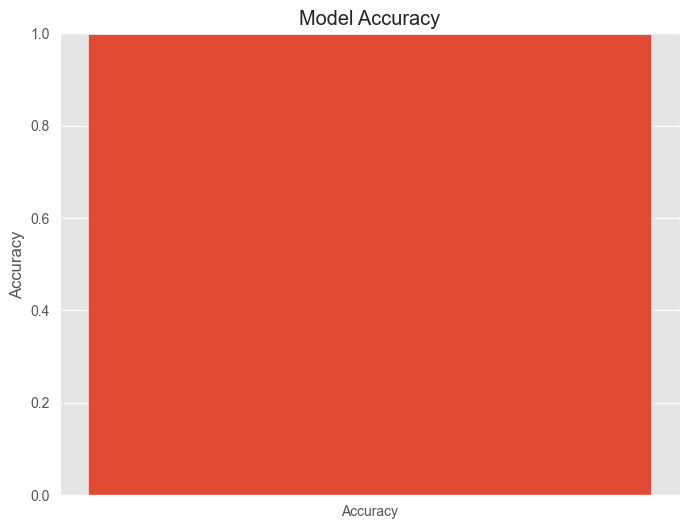

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_20features_std, y_train_20features)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test_20features_std)

# Calculate accuracy
accuracy = accuracy_score(y_test_20features, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_20features, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Get the class probabilities for each sample in the test set
class_probs = nb_classifier.predict_proba(X_test_20features_std)

# Plot the distribution of predicted classes
plt.figure(figsize=(10, 6))
for class_index in range(nb_classifier.classes_.shape[0]):
    plt.hist(class_probs[:, class_index], bins=50, alpha=0.5, label=f'Class {class_index}')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Class Probabilities')
plt.legend()
plt.show()

# Plot the accuracy of the model
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


In [15]:
#recall, precision and f1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test_20features, y_pred)
recall = recall_score(y_test_20features, y_pred)
f1 = f1_score(y_test_20features, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 1.0
Recall: 0.9989338671693562
F1 Score: 0.9994666492733181


In [16]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_20features, y_pred))


              precision    recall  f1-score   support

           0       0.39      1.00      0.56       994
           1       1.00      1.00      1.00   1472612

    accuracy                           1.00   1473606
   macro avg       0.69      1.00      0.78   1473606
weighted avg       1.00      1.00      1.00   1473606

